<a href="https://colab.research.google.com/github/OluEgwudike/COMPARATIVE-ANALYSIS-OF-SUPERVISED-AND-ENSEMBLE-MODEL-FOR-DETECTING-MALICIOUS-ACTIVITIES/blob/main/malicious_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd # allows loading of dataset
import numpy as np ## incase there is need to work with array numpy is needed
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # also for plotting (allows different colors or have different colors as output)



## machine learning model used
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import preprocessing as pp
from sklearn.metrics import roc_curve,auc
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_data = '/content/drive/MyDrive/UNSW_NB15_training-set.xls'
test_data = '/content/drive/MyDrive/UNSW_NB15_testing-set.xls'
df_train = pd.read_csv(train_data)
df_test = pd.read_csv(test_data)

# loading the train dataset

In [4]:
df_train.head() ## checking the first 5 rows of the train dataset

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [5]:
df_train.shape ## checking the total numbr rows and columns of the train dataset

(82332, 45)

In [6]:
df_train.isnull().sum() ## summing up the missing values in each columns of the train dataset

,0
id,0
dur,0
proto,0
service,0
state,0
spkts,0
dpkts,0
sbytes,0
dbytes,0
rate,0


In [7]:
df_train.info() ## checking the datatype of the train dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [8]:
df_test.head() ## checking the first 5 rows of the test dataset

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [9]:
df_test.shape ## checking the total numbr rows and columns of the test dataset

(175341, 45)

In [10]:
df_test.isnull().sum() ## summing up the missing values in each columns of the test dataset

,0
id,0
dur,0
proto,0
service,0
state,0
spkts,0
dpkts,0
sbytes,0
dbytes,0
rate,0


In [11]:
df_test.info() ## checking the datatype of the test dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

## Data pre-processing

In [12]:
df_train['label']='df_train'
df_test['label']='df_test'

In [13]:
data=pd.concat([df_train,df_test])
data.shape

(257673, 45)

## Exploratory Data Analysis

In [14]:
service_count=data['service'].value_counts()

In [15]:
service_count ## counting the total element in service column in the dataset

,count
service,
-,141321
dns,68661
http,27011
smtp,6909
ftp-data,5391
ftp,4980
pop3,1528
ssh,1506
dhcp,120


<ipython-input-16-c2b17614dede>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=service_count.index,y=service_count.values,palette='Set3')


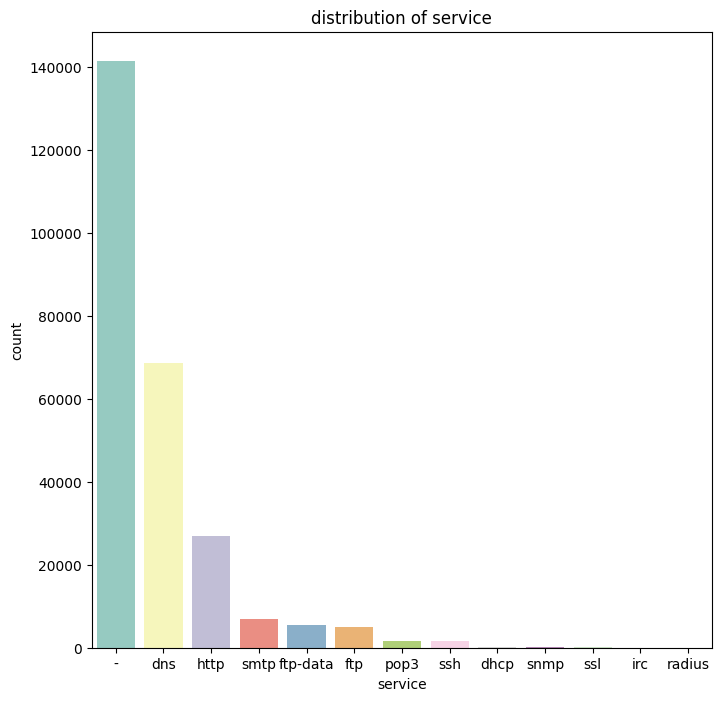

In [16]:
## plotting a bar chart
fig = plt.figure(figsize=(8,8))
sns.barplot(x=service_count.index,y=service_count.values,palette='Set3')
plt.title('distribution of service')
plt.xlabel('service')
plt.ylabel('count')
plt.show()

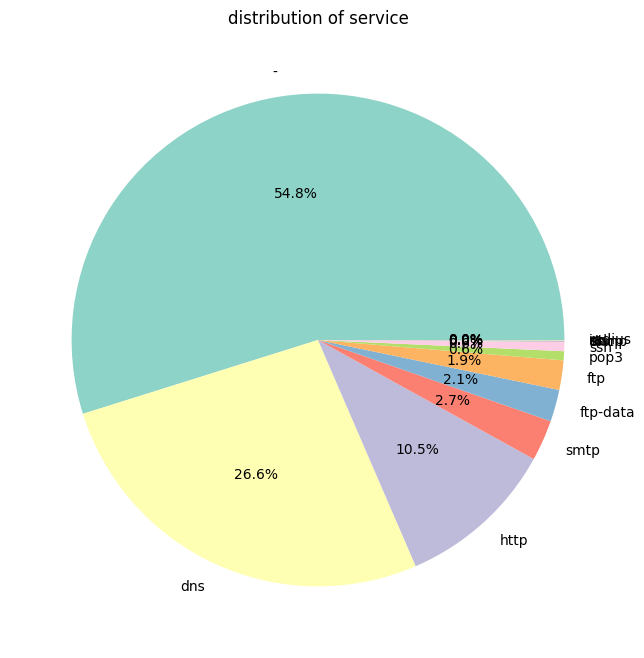

In [17]:
## plotting a pie chart
plt.figure(figsize=(8,8))
plt.pie(service_count.values,labels=service_count.index,autopct='%1.1f%%',colors=sns.color_palette('Set3',len(service_count)))
plt.title('distribution of service')
plt.show()

In [18]:
attack_cat=data['attack_cat'].value_counts()

In [19]:
attack_cat ## counting the total element in attack_cat column in the dataset

,count
attack_cat,
Normal,93000
Generic,58871
Exploits,44525
Fuzzers,24246
DoS,16353
Reconnaissance,13987
Analysis,2677
Backdoor,2329
Shellcode,1511


<ipython-input-20-870f0b037030>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attack_cat.index,y=attack_cat.values,palette='Set3')


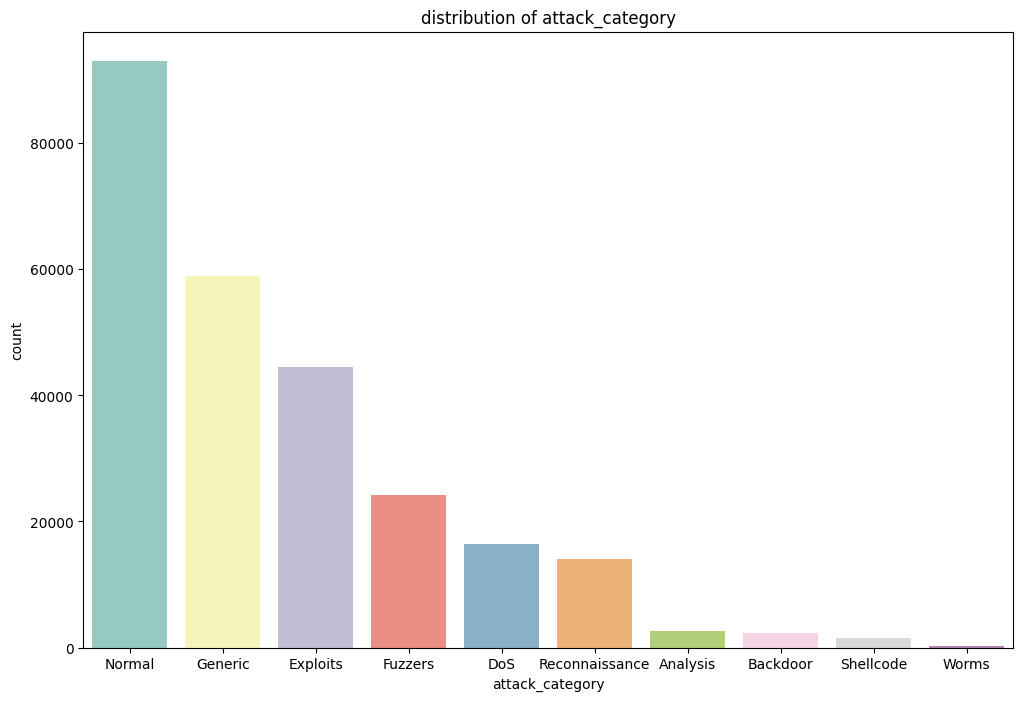

In [20]:
## plotting a bar chart
fig =plt.figure(figsize=(12,8))
sns.barplot(x=attack_cat.index,y=attack_cat.values,palette='Set3')
plt.title('distribution of attack_category')
plt.xlabel('attack_category')
plt.ylabel('count')
plt.show()

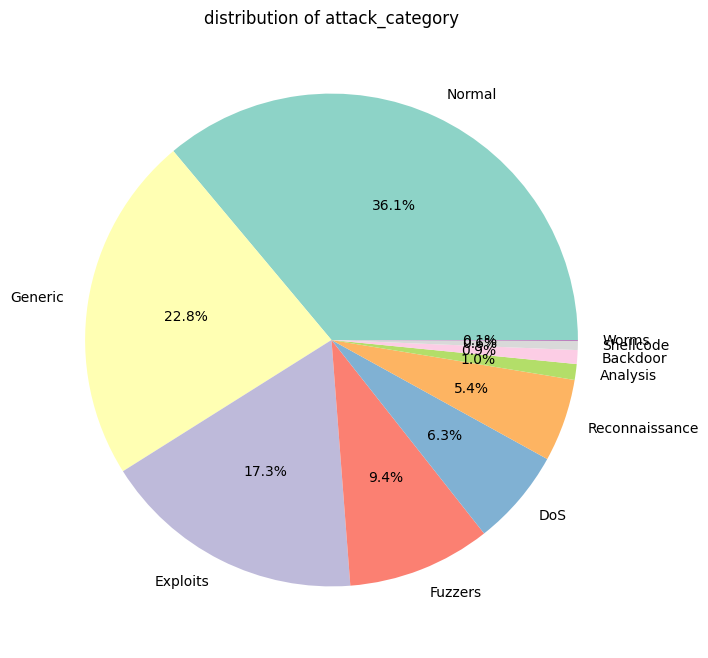

In [21]:
## plot a pie chart
plt.figure(figsize=(8,8))
plt.pie(attack_cat.values,labels=attack_cat.index,autopct='%1.1f%%',colors=sns.color_palette('Set3',len(attack_cat)))
plt.title('distribution of attack_category')
plt.show()


## Data pre-processing before applying model on the dataset

In [22]:
X=data.drop(['label','state'],axis=1)
y=data['label']

In [23]:
X=X.select_dtypes(np.number)


In [24]:
X ## checking the numeric columns

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,1,0.000011,2,0,496,0,90909.090200,254,0,1.803636e+08,...,1,1,1,2,0,0,0,1,2,0
1,2,0.000008,2,0,1762,0,125000.000300,254,0,8.810000e+08,...,1,1,1,2,0,0,0,1,2,0
2,3,0.000005,2,0,1068,0,200000.005100,254,0,8.544000e+08,...,1,1,1,3,0,0,0,1,3,0
3,4,0.000006,2,0,900,0,166666.660800,254,0,6.000000e+08,...,2,2,1,3,0,0,0,2,3,0
4,5,0.000010,2,0,2126,0,100000.002500,254,0,8.504000e+08,...,2,2,1,3,0,0,0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,...,24,24,13,24,0,0,0,24,24,0
175337,175338,0.505762,10,8,620,354,33.612649,254,252,8.826286e+03,...,1,1,1,2,0,0,0,1,1,0
175338,175339,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,...,3,3,3,13,0,0,0,3,12,0
175339,175340,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,...,30,30,14,30,0,0,0,30,30,0


In [25]:

label_encoder=pp.LabelEncoder()
label_encoder

LabelEncoder()

In [26]:
for column in data:
    data['label']=label_encoder.fit_transform(data['label'])

In [27]:
y=data['label']

# splitting dataset into train and test
1. train (80%)
2. test (20%)

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,train_size=0.8,random_state=101)

In [29]:

# Predicting the Test set results


def report_performance(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    #cm = metrics.confusion_matrix(y_test, model_test)
    plot_confusion_metrix(y_test, model_test)


def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

def accuracy(model):
    pred = model.predict(X_test1)
    accu = metrics.accuracy_score(y_test,pred)
    print("\nAcuuracy Of the Model: ",accu,"\n\n")
    #total_accuracy[str((str(model).split('(')[0]))] = accu

In [30]:


def plot_confusion_metrix(y_test,model_test):
  cm=metrics.confusion_matrix(y_test,model_test)
  plt.figure(figsize=(8,8))
  plt.clf()
  plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Accent)
  ClassNames=['Normal','Malicious']
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks=np.arange(len(ClassNames))
  plt.xticks(tick_marks,ClassNames,rotation=45)
  plt.yticks(tick_marks,ClassNames)
  s= [['TN','FP'],['FN','TP']]
  for i in range(2):
    for j in range(2):
      plt.text(j,i,str(s[i][j])+"="+str(cm[i][j]))
  plt.show()

# supervised machine learning model

## logisitic regression model

In [31]:


# Initialize the logistic regression model
log_reg = LogisticRegression()

# Train the logistic regression model on the training data
log_reg.fit(X_train, y_train)

# Predict the labels for the training set
y_pred_train_log_reg = log_reg.predict(X_train)

# Calculate the accuracy on the training set
train_accuracy_log_reg = accuracy_score(y_train, y_pred_train_log_reg)

# Predict the labels for the test set
y_pred_log_reg = log_reg.predict(X_test)

# Calculate the accuracy on the test set
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

# Print the accuracy of logistic regression
print('Accuracy of logistic regression:', accuracy_log_reg)
print('==================================================')


Accuracy of logistic regression: 0.701057533714951


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###  model evaluation for logistic regression



Confusion Matrix:
[[32555  2600]
 [12806  3574]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.72      0.93      0.81     35155
           1       0.58      0.22      0.32     16380

    accuracy                           0.70     51535
   macro avg       0.65      0.57      0.56     51535
weighted avg       0.67      0.70      0.65     51535



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


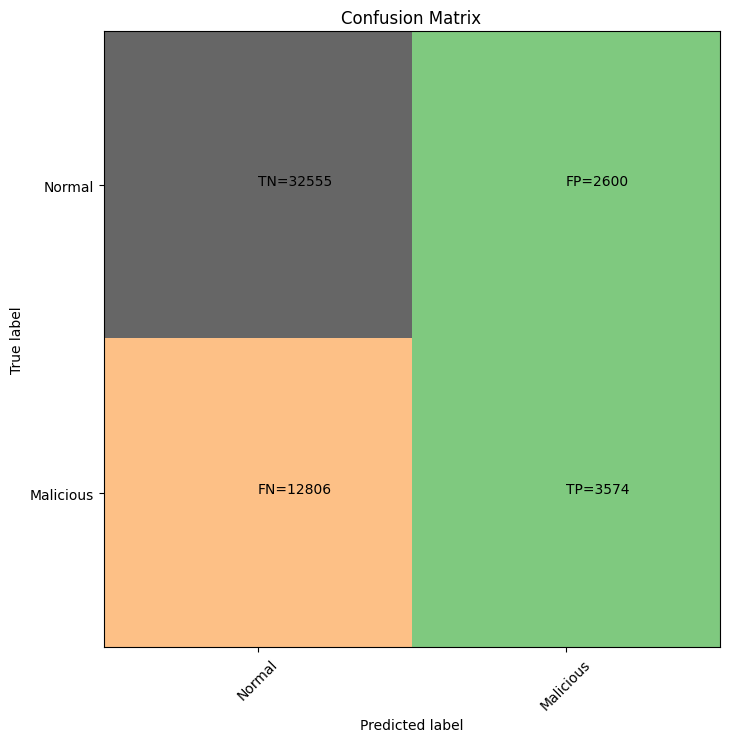

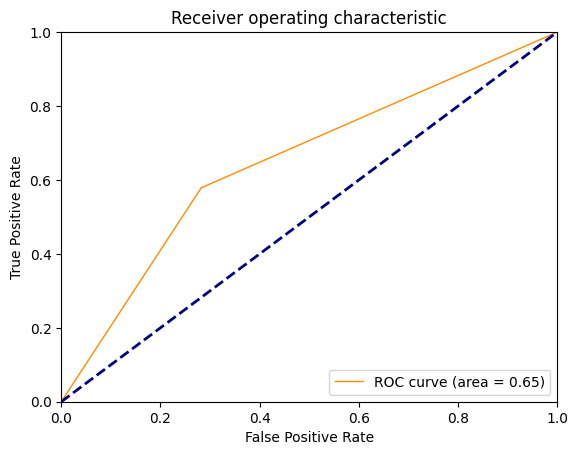

In [32]:
log_reg.fit(X_train,y_train)
pred_log=log_reg.predict(X_test)
report_performance(log_reg)
print('')
roc_curves(log_reg)

## naive bayes model

In [33]:

# Initialize the Naive Bayes classifier
naive_bayes = GaussianNB()

# Train the Naive Bayes classifier on the training data
naive_bayes.fit(X_train, y_train)

# Predict the labels for the training set
y_pred_train_naive_bayes = naive_bayes.predict(X_train)

# Calculate the accuracy on the training set
train_accuracy_naive_bayes = accuracy_score(y_train, y_pred_train_naive_bayes)

# Predict the labels for the test set
y_pred_naive_bayes = naive_bayes.predict(X_test)

# Calculate the accuracy on the test set
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)

# Print the accuracy of Naive Bayes classifier
print('Accuracy of Naive Bayes classifier:', accuracy_naive_bayes)
print('==================================================')


Accuracy of Naive Bayes classifier: 0.6336082274182594


## model evaluation for naive bayes model



Confusion Matrix:
[[28545  6610]
 [12272  4108]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.70      0.81      0.75     35155
           1       0.38      0.25      0.30     16380

    accuracy                           0.63     51535
   macro avg       0.54      0.53      0.53     51535
weighted avg       0.60      0.63      0.61     51535



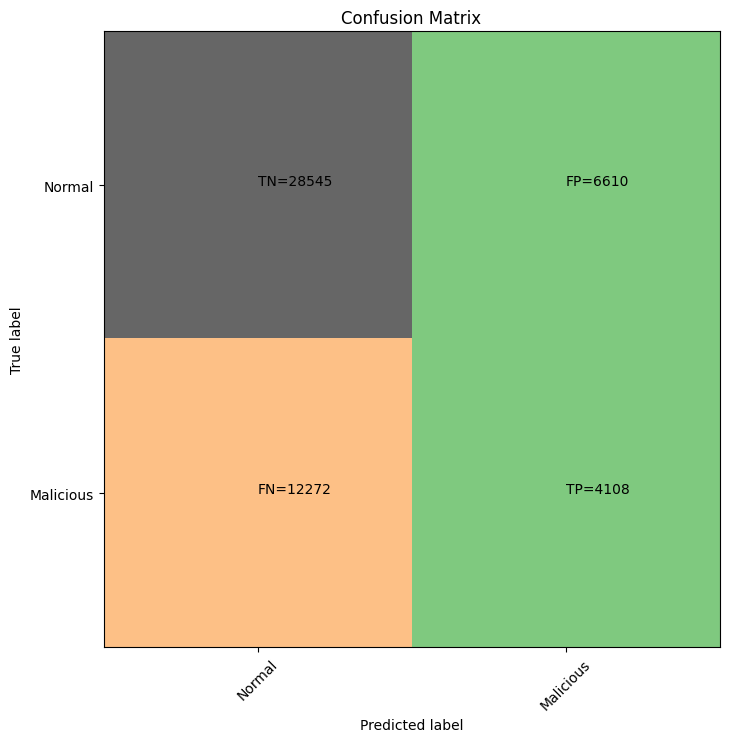

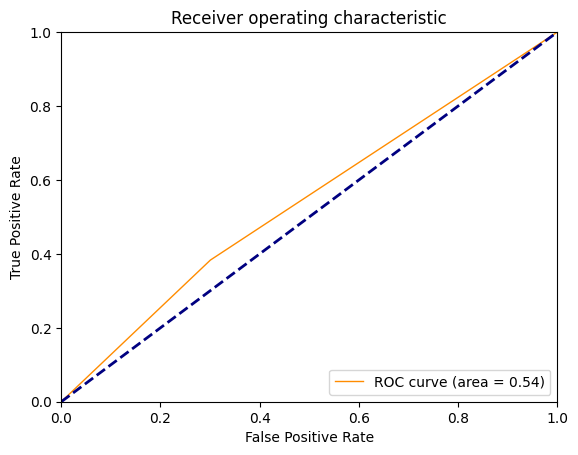

In [34]:
naive_bayes.fit(X_train,y_train)
pred_naive=naive_bayes.predict(X_test)
report_performance(naive_bayes)
print('')
roc_curves(naive_bayes)

## KNN model

In [35]:
## initialize knn classifier
knn=KNeighborsClassifier()
## train the knn model
knn.fit(X_train,y_train)


## predicting the label for the training set
y_pred_train=knn.predict(X_train)

## caculating the accuracy of training set
train_accuracy = accuracy_score(y_train,y_pred_train)

## pedict the label on the test set
y_pred_test=knn.predict(X_test)

## calculate the accuracy of the test set
test_accuracy= accuracy_score(y_test,y_pred_test)
## print the accuracy of knn model
print('Accuracy of knn classifier:',test_accuracy)
print('==================================================')

Accuracy of knn classifier: 0.7817793732414864


## model evaluation for KNN model



Confusion Matrix:
[[30793  4362]
 [ 6884  9496]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.88      0.85     35155
           1       0.69      0.58      0.63     16380

    accuracy                           0.78     51535
   macro avg       0.75      0.73      0.74     51535
weighted avg       0.78      0.78      0.78     51535



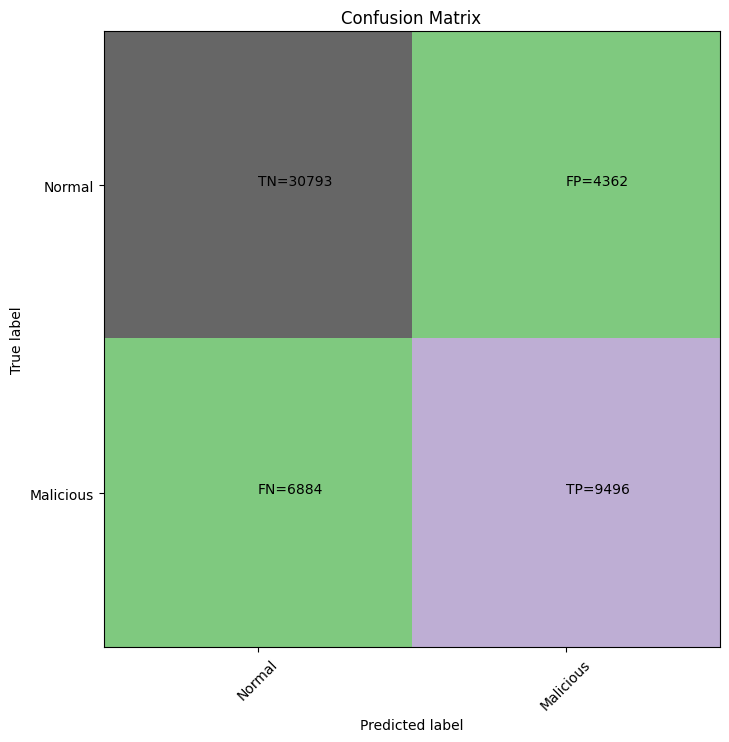

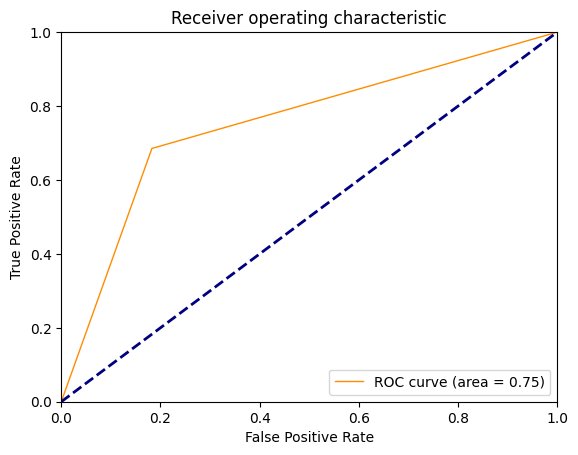

In [36]:
knn.fit(X_train,y_train)
pred_knn=knn.predict(X_test)
report_performance(knn)
print('')
roc_curves(knn)

##  supervised machine learning model comparison

Text(0.5, 1.0, 'Model Performance Comparison')

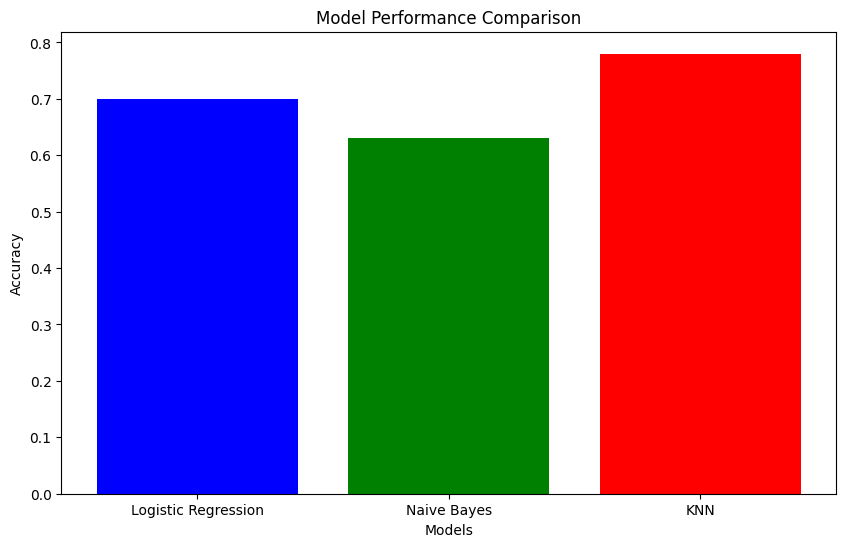

In [37]:
## performance comparision
models = ['Logistic Regression', 'Naive Bayes', 'KNN']
accuracies = [0.70, 0.63,0.78]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')

## ENSEMBLE MODELS

1. gradient boosting

2. Bagging classifier

3. staccking classifier

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
gbc=GradientBoostingClassifier()
## training the model, the base classifier in gradient boosting is decision tree
gbc.fit(X_train,y_train)
y_pred_train_gbc=gbc.predict(X_train)
train_accuracy_gbc=accuracy_score(y_train,y_pred_train_gbc)
y_pred_gbc=gbc.predict(X_test)
gbc_accuracy=accuracy_score(y_test,y_pred_gbc)
print('accuracy of gradient boosting', gbc_accuracy)

accuracy of gradient boosting 0.908256524691957




Confusion Matrix:
[[32969  2186]
 [ 2542 13838]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     35155
           1       0.86      0.84      0.85     16380

    accuracy                           0.91     51535
   macro avg       0.90      0.89      0.89     51535
weighted avg       0.91      0.91      0.91     51535



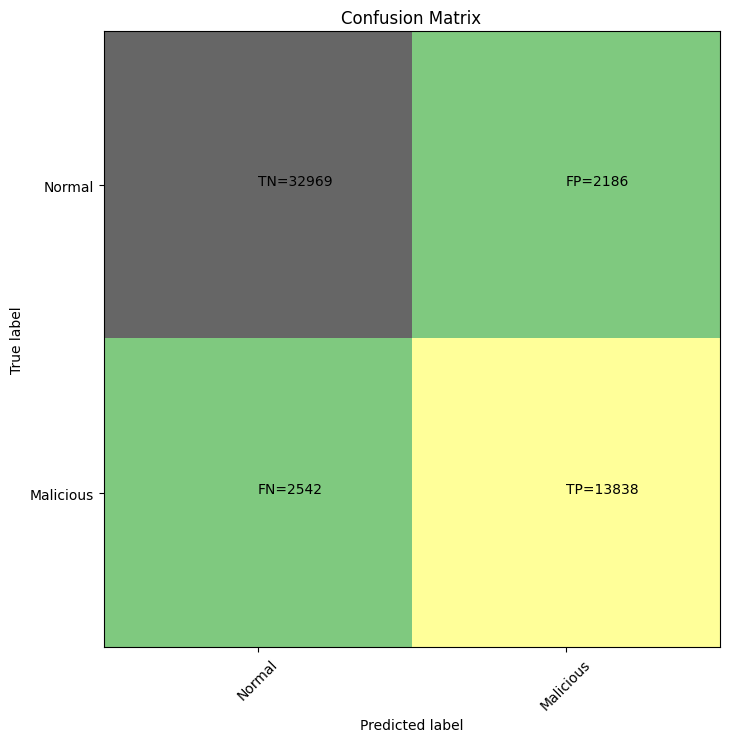

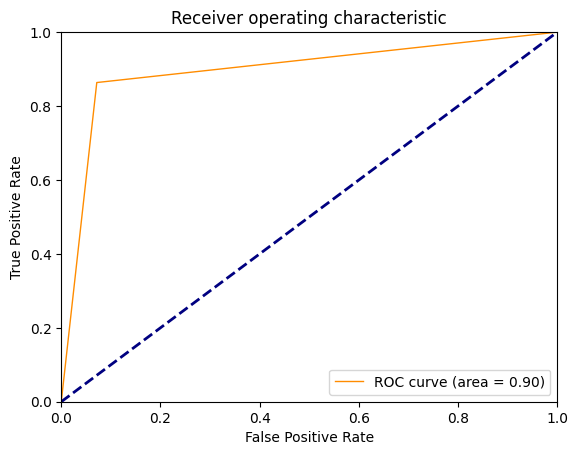

In [41]:
gbc.fit(X_train,y_train)
pred_gbc=gbc.predict(X_test)
report_performance(gbc)
print('')
roc_curves(gbc)

## Bagging classifier

In [42]:
from sklearn.ensemble import BaggingClassifier

In [43]:
bc=BaggingClassifier()
bc.fit(X_train,y_train)
## training bagging classifier ## the base classifier in bagging is decision tree
y_pred_train_bc=bc.predict(X_train)
y_pred_bc=bc.predict(X_test)
accuracy_bc=accuracy_score(y_test,y_pred_gbc)
print('accuracy of bagging classifier is:',accuracy_bc)

accuracy of bagging classifier is: 0.908256524691957




Confusion Matrix:
[[34343   812]
 [ 1057 15323]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     35155
           1       0.95      0.94      0.94     16380

    accuracy                           0.96     51535
   macro avg       0.96      0.96      0.96     51535
weighted avg       0.96      0.96      0.96     51535



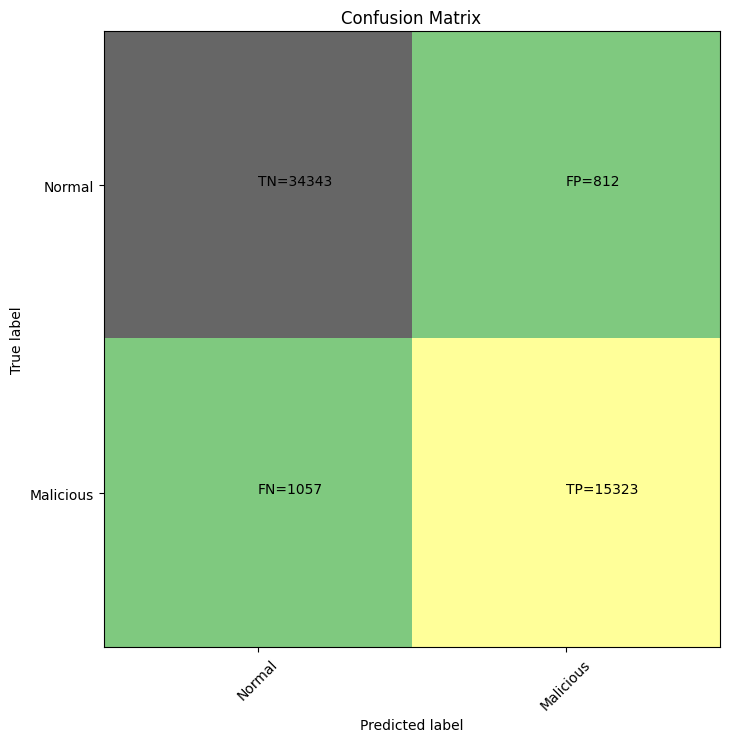

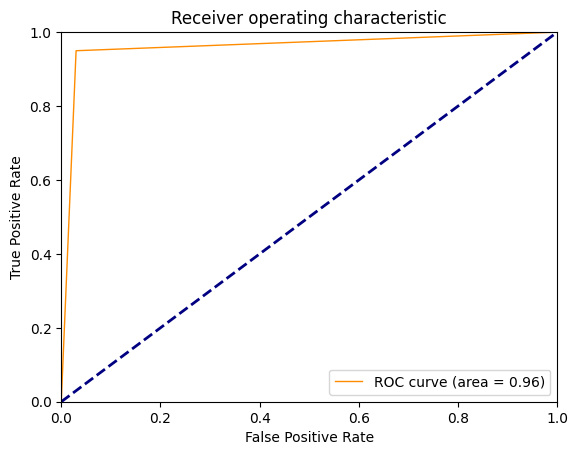

In [52]:
bc.fit(X_train,y_train)
pred_bc=bc.predict(X_test)
report_performance(bc)
print('')
roc_curves(bc)

In [45]:
from mlxtend.classifier import StackingClassifier## mlxtend allows you to introduce the base classifier you want.

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
clf1=LogisticRegression()
clf2=RandomForestClassifier() ## clf1 and clf2 are my base classifiers

stacking_clf=StackingClassifier(classifiers=[clf1,clf2],meta_classifier=clf2)



In [50]:
stacking_clf.fit(X_train,y_train)
y_pred_stacking=stacking_clf.predict(X_test)
accuracy_stacking=accuracy_score(y_test,y_pred_bc)
print('accuracy of stacking classifier is:',accuracy_stacking)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy of stacking classifier is: 0.964102066556709


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




Confusion Matrix:
[[34207   948]
 [  986 15394]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     35155
           1       0.94      0.94      0.94     16380

    accuracy                           0.96     51535
   macro avg       0.96      0.96      0.96     51535
weighted avg       0.96      0.96      0.96     51535



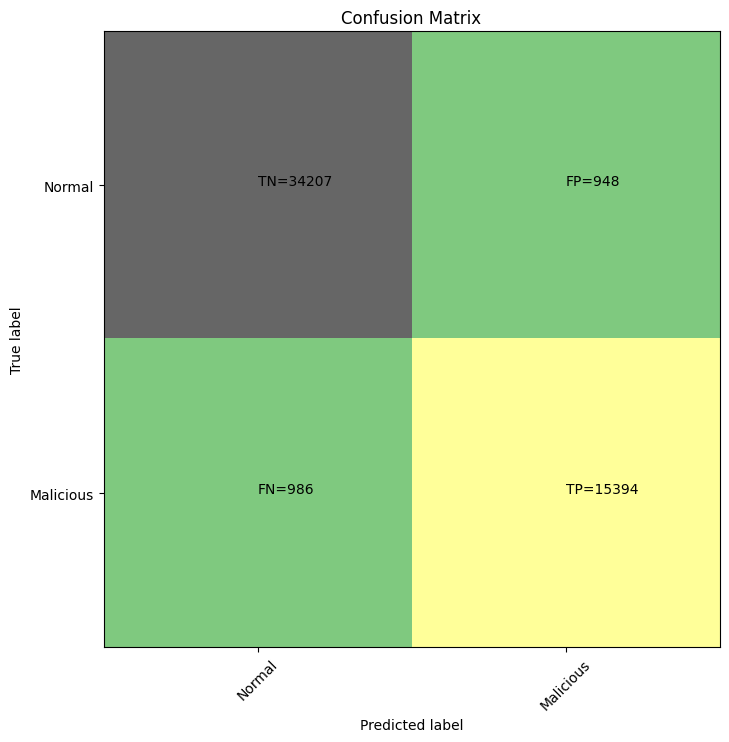

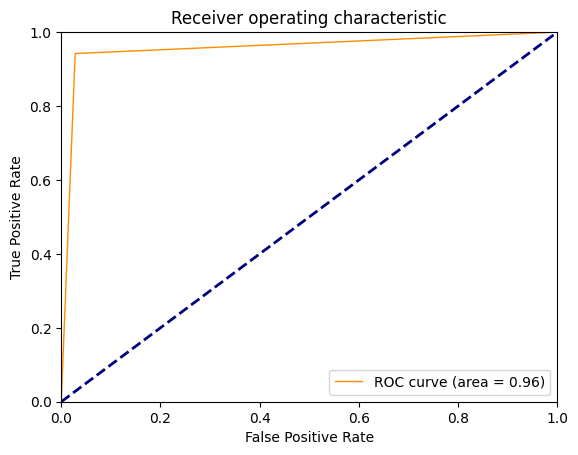

In [53]:
stacking_clf.fit(X_train,y_train)
pred_stacking=stacking_clf.predict(X_test)
report_performance(stacking_clf)
print('')
roc_curves(stacking_clf)

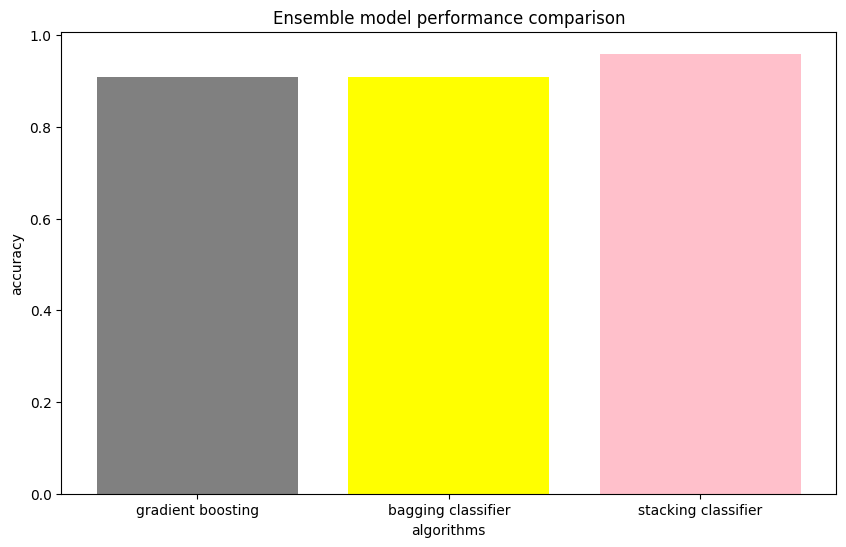

In [56]:
algorithms=['gradient boosting','bagging classifier','stacking classifier']
accuracy= [0.91,0.91,0.96]
plt.figure(figsize=(10,6))
plt.bar(algorithms,accuracy,color=['grey','yellow','pink'])
plt.xlabel('algorithms')
plt.ylabel('accuracy')
plt.title('Ensemble model performance comparison')
plt.show()

## comparsion between supervised and ensemble model in malicious detection

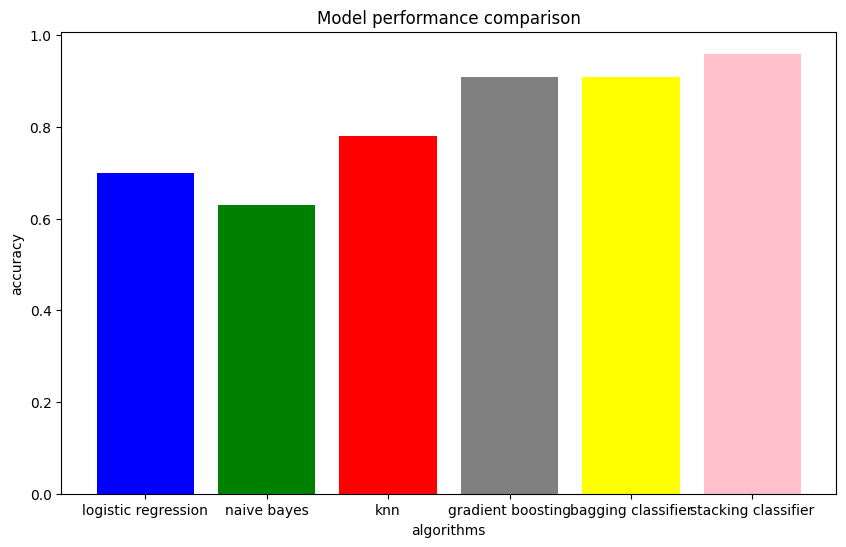

In [57]:
algorithms=['logistic regression','naive bayes','knn','gradient boosting','bagging classifier','stacking classifier']
accuracy= [0.70,0.63,0.78,0.91,0.91,0.96]
plt.figure(figsize=(10,6))
plt.bar(algorithms,accuracy,color=['blue','green','red','grey','yellow','pink'])
plt.xlabel('algorithms')
plt.ylabel('accuracy')
plt.title('Model performance comparison')
plt.show()